In [4]:
import pandas as pd

# Read data from CSV file
df = pd.read_csv('data.csv')

# Display the first few rows of the dataframe to verify
print(df.head())


  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737   
1   

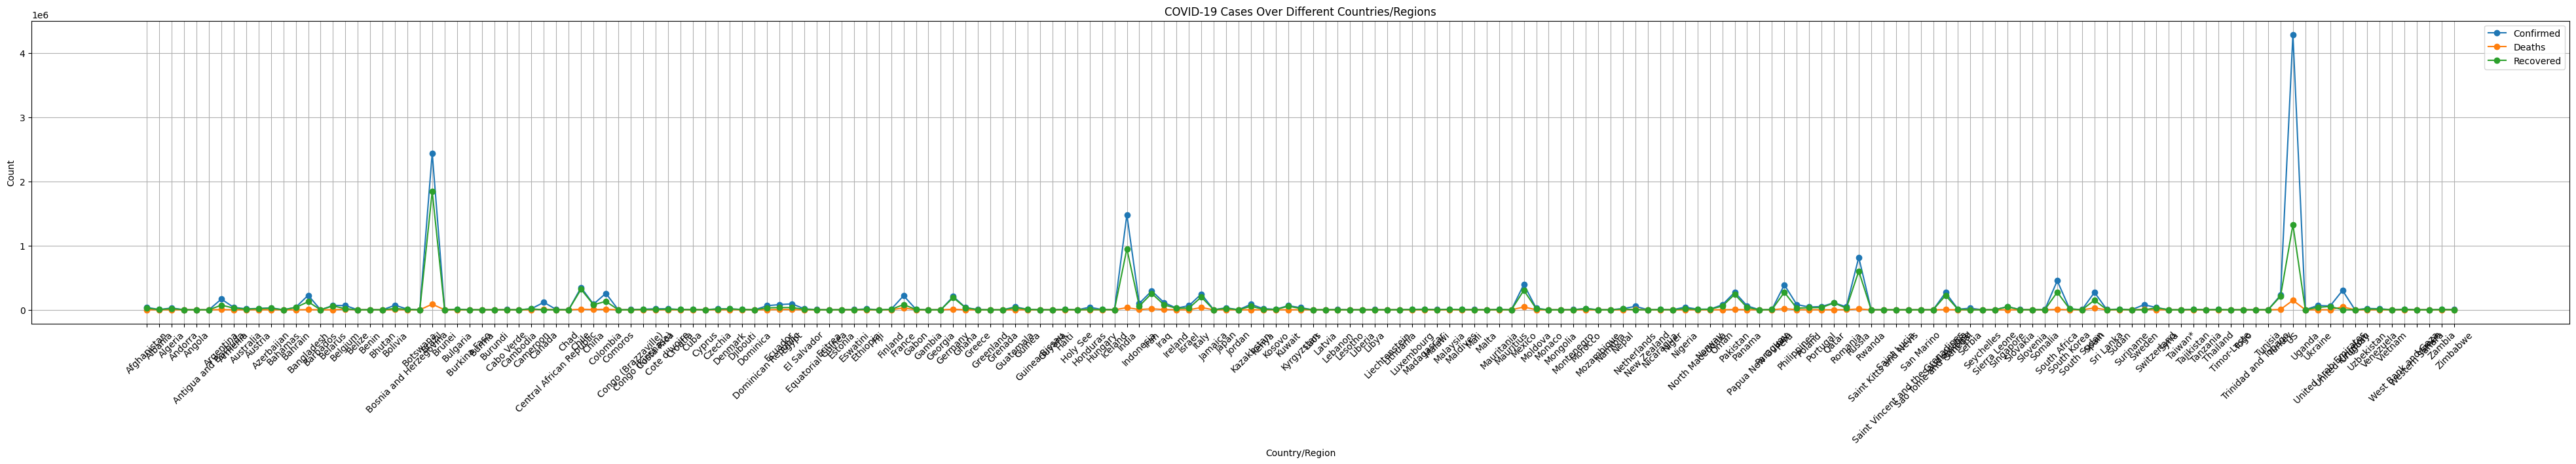

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(50, 6))
plt.plot(df['Country/Region'], df['Confirmed'], marker='o', label='Confirmed')
plt.plot(df['Country/Region'], df['Deaths'], marker='o', label='Deaths')
plt.plot(df['Country/Region'], df['Recovered'], marker='o', label='Recovered')
plt.xlabel('Country/Region')
plt.ylabel('Count')
plt.title('COVID-19 Cases Over Different Countries/Regions')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


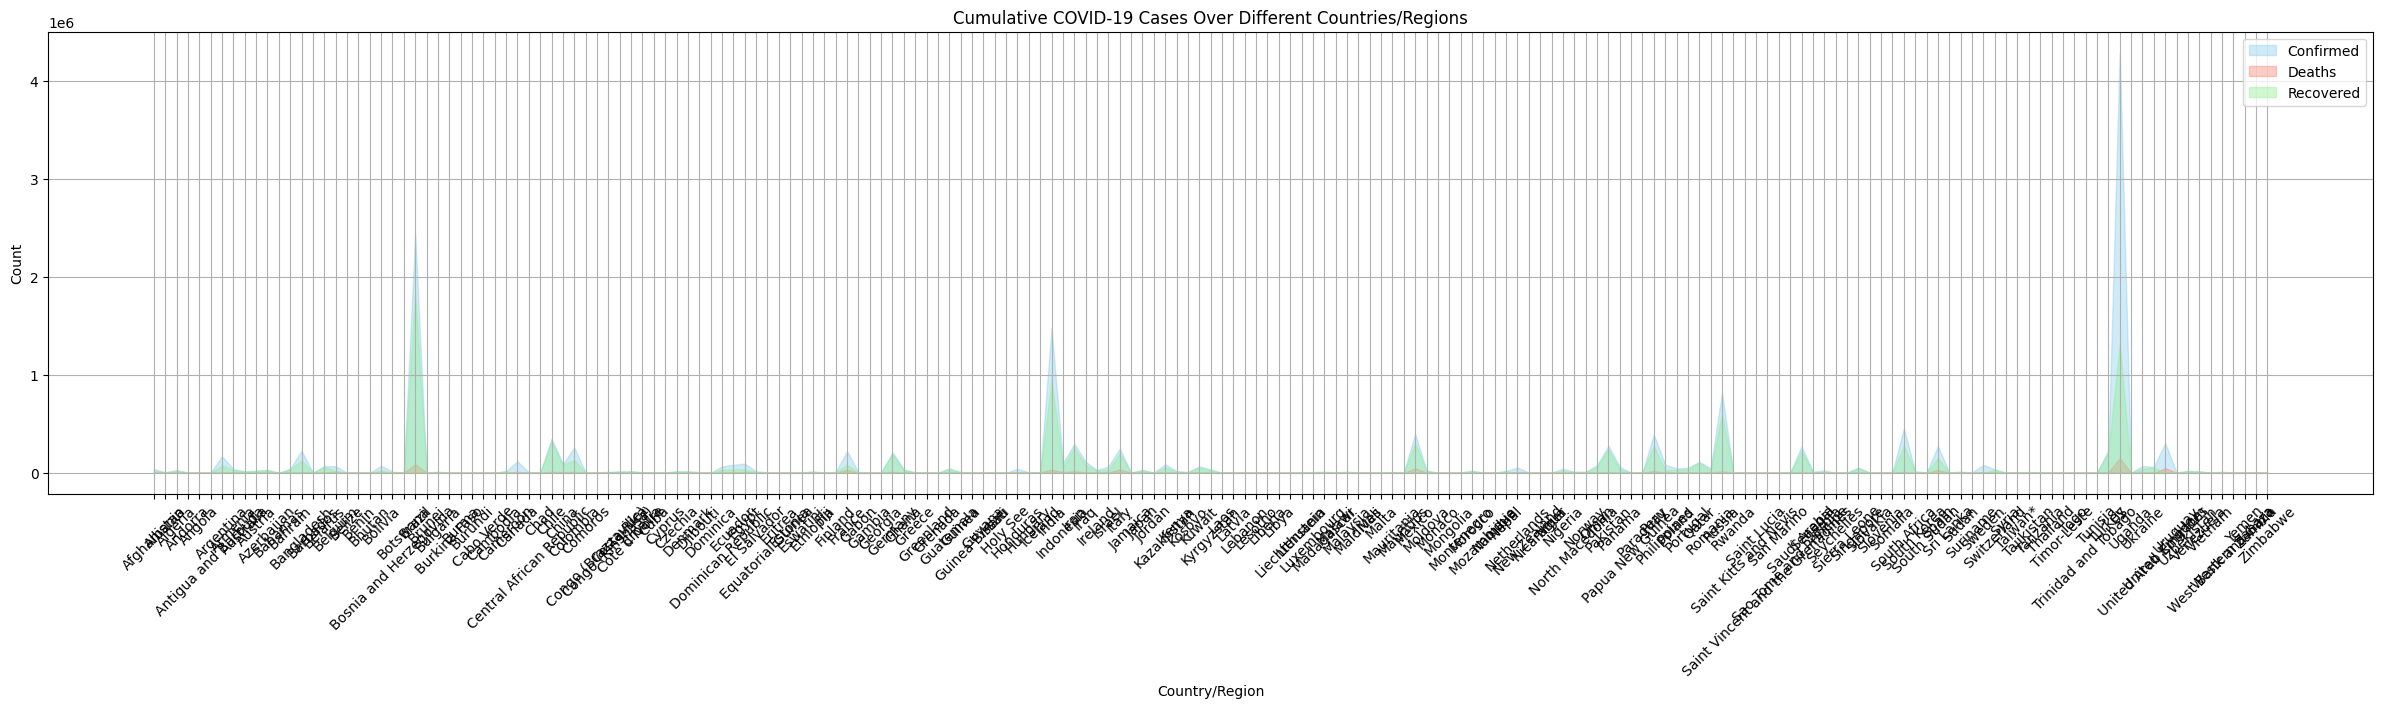

In [13]:
plt.figure(figsize=(30, 6))
plt.fill_between(df['Country/Region'], df['Confirmed'], color="skyblue", alpha=0.4, label='Confirmed')
plt.fill_between(df['Country/Region'], df['Deaths'], color="salmon", alpha=0.4, label='Deaths')
plt.fill_between(df['Country/Region'], df['Recovered'], color="lightgreen", alpha=0.4, label='Recovered')
plt.xlabel('Country/Region')
plt.ylabel('Count')
plt.title('Cumulative COVID-19 Cases Over Different Countries/Regions')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [7]:
import plotly.express as px

fig = px.treemap(df,
                 path=['WHO Region', 'Country/Region'],
                 values='Confirmed',
                 color='Confirmed',
                 hover_data=['Deaths', 'Recovered'])
fig.update_layout(title='Treemap of COVID-19 Confirmed Cases')
fig.show()


In [8]:
import plotly.graph_objects as go

fig = go.Figure(go.Waterfall(
    measure=["absolute", "relative", "relative", "relative", "total"],
    x=["Start", "New cases", "New deaths", "New recovered", "End"],
    y=[df['Confirmed'].sum(), df['New cases'].sum(), -df['New deaths'].sum(), df['New recovered'].sum(), df['Active'].sum()],
    connector=dict(line=dict(color="rgb(63, 63, 63)"))
))
fig.update_layout(title='Waterfall Chart of COVID-19 Cases')
fig.show()


In [9]:
import plotly.graph_objects as go

fig = go.Figure(go.Funnel(
    y=["Confirmed", "Active", "Recovered", "Deaths"],
    x=[df['Confirmed'].sum(), df['Active'].sum(), df['Recovered'].sum(), df['Deaths'].sum()],
    textinfo="value+percent initial"
))
fig.update_layout(title='Funnel Chart of COVID-19 Data')
fig.show()


In [10]:
import plotly.graph_objects as go

fig = go.Figure(go.Pie(
    labels=df['Country/Region'],
    values=df['Confirmed'],
    hole=0.4,
    textinfo='label+percent',
    insidetextorientation='radial'
))
fig.update_layout(title='Donut Chart of COVID-19 Confirmed Cases')
fig.show()
